<a href="https://colab.research.google.com/github/Raghuvansyn/AgroBot/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(ds_train, ds_info) = tfds.load(
    'plant_village',
    split='train',
    with_info=True,
    as_supervised=True
)

class_names = ds_info.features['label'].names
print(f"Number of classes: {len(class_names)}")
print("Example classes:", class_names[:10])


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.U0DQ8A_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.
Number of classes: 38
Example classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___healthy', 'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___healthy']


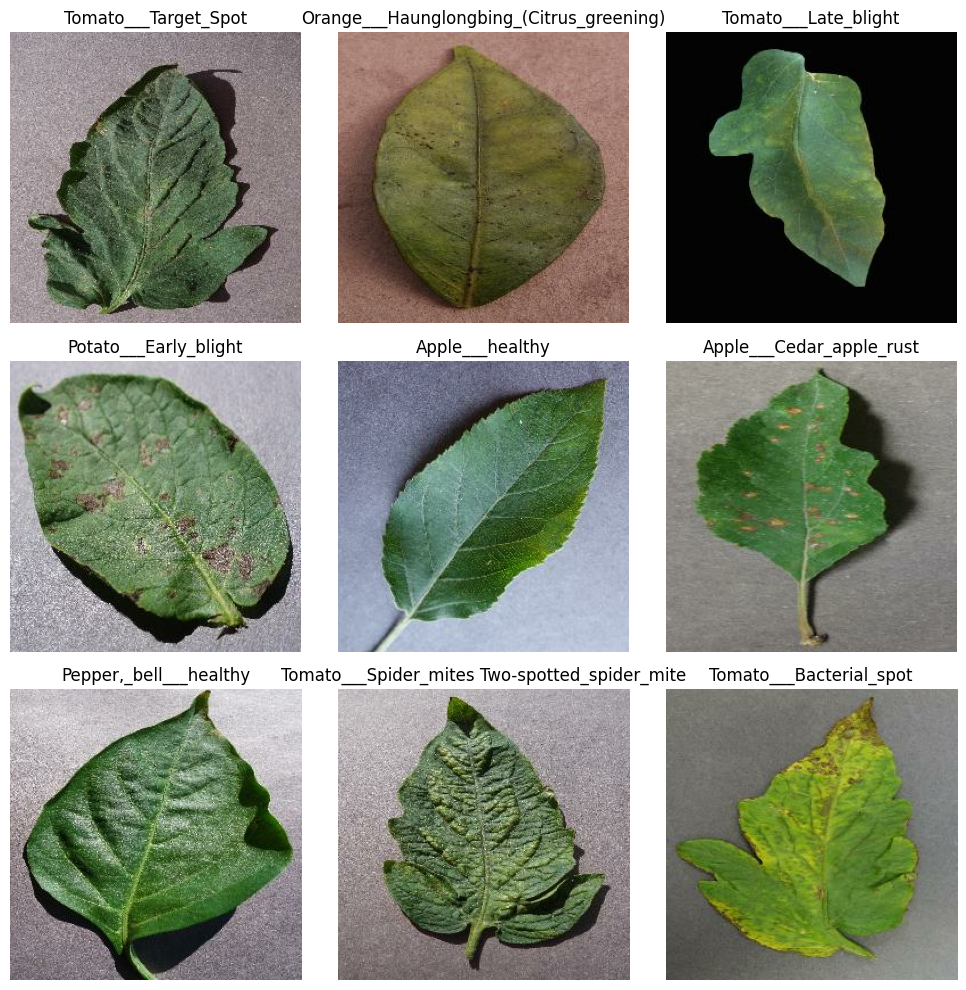

In [13]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_train.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128)) / 255.0
    return image, label

train_data = tfds.load('plant_village', split='train[:80%]', as_supervised=True)
test_data = tfds.load('plant_village', split='train[80%:]', as_supervised=True)

train_data = train_data.map(preprocess).shuffle(1000).batch(32)
test_data = test_data.map(preprocess).batch(32)


In [5]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15
)


Epoch 1/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - accuracy: 0.3255 - loss: 2.5538 - val_accuracy: 0.7262 - val_loss: 0.9283
Epoch 2/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.6852 - loss: 1.0458 - val_accuracy: 0.8483 - val_loss: 0.4937
Epoch 3/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7796 - loss: 0.7131 - val_accuracy: 0.8717 - val_loss: 0.3994
Epoch 4/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.8317 - loss: 0.5372 - val_accuracy: 0.9119 - val_loss: 0.2761
Epoch 5/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.8658 - loss: 0.4140 - val_accuracy: 0.9215 - val_loss: 0.2471
Epoch 6/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8925 - loss: 0.3407 - val_accuracy: 0.9362 - val_loss: 0.1947
Epoch 7/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9083 - loss: 0.2801 - val_accuracy: 0.9448 - val_loss: 0.1752
Epoch 8/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9220 -

In [7]:
model.save('my_model.keras')

In [8]:
from tensorflow.keras.models import load_model
model = load_model('my_model.keras')
print("Model loaded successfully!")


Model loaded successfully!


In [9]:
import json

with open("class_names.json", "w") as f:
    json.dump(class_names, f)



In [10]:
test_loss, test_acc = model.evaluate(test_data)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")


340/340 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9617 - loss: 0.1317

 Test Accuracy: 96.02%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


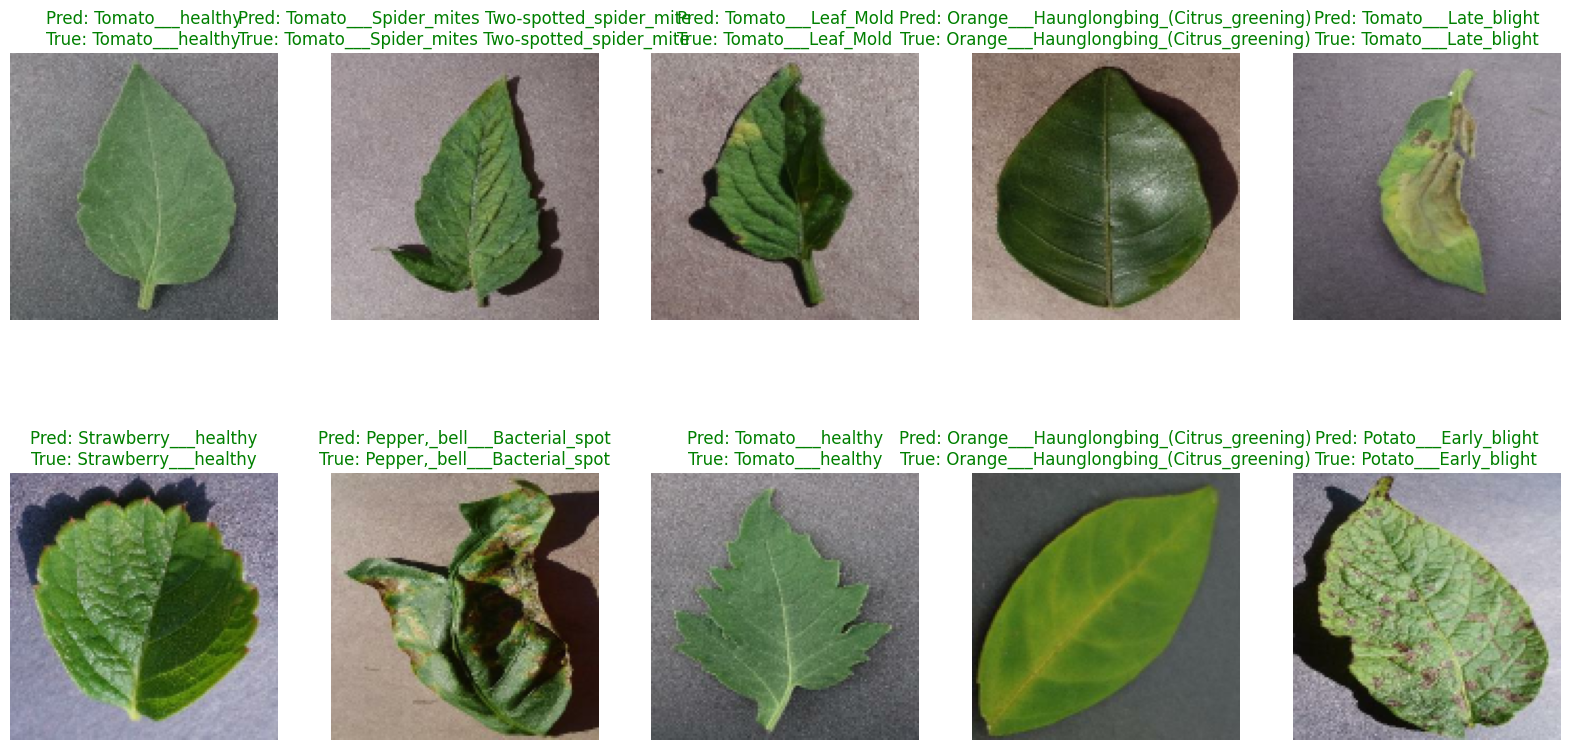

In [11]:
for images, labels in test_data.take(1):
    preds = model.predict(images)
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_names[labels[i]]
        pred_label = class_names[np.argmax(preds[i])]
        color = "green" if true_label == pred_label else "red"
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
        plt.axis("off")
    plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image

from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    disease_name = class_names[predicted_class]
    confidence = np.max(prediction) * 100

    plt.imshow(img)
    plt.title(f"Predicted: {disease_name}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()


In [15]:
%%writefile app.py
import os
from flask import Flask, request, render_template
from werkzeug.utils import secure_filename

model = load_model('my_model.keras')

with open('class_names.json', 'r') as f:
    class_names = json.load(f)

app = Flask(__name__)
UPLOAD_FOLDER = "static/uploads"
app.config["UPLOAD_FOLDER"] = UPLOAD_FOLDER

ALLOWED = {'png', 'jpg', 'jpeg'}

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED

def predict_image(filepath):
    img = image.load_img(filepath, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    index = np.argmax(prediction)
    label = class_names[index]
    confidence = float(np.max(prediction)) * 100

    return label, confidence

@app.route("/")
def index():
    return render_template("index.html")

@app.route("/predict", methods=["POST"])
def upload():
    if "file" not in request.files:
        return "No file uploaded"

    file = request.files["file"]

    if file.filename == "":
        return "File has no name"

    if file and allowed_file(file.filename):
        filename = secure_filename(file.filename)
        filepath = os.path.join(app.config["UPLOAD_FOLDER"], filename)
        file.save(filepath)

        label, confidence = predict_image(filepath)
        return render_template("result.html",
                               filename=filename,
                               label=label,
                               confidence=confidence)

    return "File type not allowed"

@app.route('/uploads/<filename>')
def uploaded_file(filename):
    return f"/static/uploads/{filename}"

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


Writing app.py


In [16]:

import os

os.makedirs("static/uploads", exist_ok=True)
os.makedirs("templates", exist_ok=True)

print("Folders created: static/uploads and templates/")


Folders created: static/uploads and templates/


In [18]:
%%writefile templates/index.html
<!DOCTYPE html>
<html>
<head>
    <title>Plant Disease Detector</title>
    <style>
        body { font-family: Arial; padding: 20px; }
        .card { width: 400px; margin: auto; padding: 20px; border: 1px solid #ccc; border-radius: 8px; }
        .btn { margin-top: 10px; padding: 10px 15px; background: #28a745; color: white; border: none; cursor: pointer; border-radius: 5px; }
    </style>
</head>
<body>
    <div class="card">
        <h2>Upload Leaf Image</h2>
        <form action="/predict" method="POST" enctype="multipart/form-data">
            <input type="file" name="file" accept="image/*" required><br><br>
            <button class="btn" type="submit">Predict Disease</button>
        </form>
    </div>
</body>
</html>


Writing templates/index.html


In [19]:
%%writefile templates/result.html
<!DOCTYPE html>
<html>
<head>
    <title>Prediction Result</title>
    <style>
        body { font-family: Arial; padding: 20px; max-width: 800px; margin: auto; }
        .card { padding: 20px; border: 1px solid #ddd; border-radius: 8px; text-align: center; }
        img { max-width: 100%; height: auto; border-radius: 6px; margin-bottom: 12px; }
        .label { font-size: 1.1rem; margin-top: 8px; }
        a { display: inline-block; margin-top: 12px; color: #007bff; text-decoration: none; }
    </style>
</head>
<body>
    <h2>Prediction Result</h2>
    <div class="card">
        <!-- show the uploaded image -->
        <img src="{{ url_for('static', filename='uploads/' + filename) }}" alt="Uploaded Image">
        <div class="label"><strong>Predicted:</strong> {{ label }}</div>
        <div class="label"><strong>Confidence:</strong> {{ confidence }}%</div>
        <a href="{{ url_for('index') }}">Upload another image</a>
    </div>
</body>
</html>


Writing templates/result.html


In [20]:
!pip install -q pyngrok flask tensorflow


In [21]:
from pyngrok import ngrok
ngrok.set_auth_token("35gjGPfFAfPuVrBMWRgyzSCb5el_3SxnHh2jo3Qj7tdU8e7V4")
print("authtoken set")


authtoken set


In [22]:
import subprocess, time, os, signal
from pyngrok import ngrok

try:
    ngrok.kill()
except Exception:
    pass

proc = subprocess.Popen(["python", "-u", "app.py"], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

time.sleep(2)

public_url = ngrok.connect(5000).public_url
print("Public URL:", public_url)
print("Flask process pid:", proc.pid)


Public URL: https://malaysia-spiroid-kristin.ngrok-free.dev
Flask process pid: 25257
